In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("disney_sample_data.csv")

In [2]:
print(df)

      Unnamed: 0         created_date  \
0              0  2023-10-05 22:00:01   
1              1  2023-10-25 19:40:51   
2              2  2023-10-19 17:46:02   
3              3  2023-10-24 14:49:35   
4              4  2023-10-25 15:48:29   
...          ...                  ...   
4791        4791  2023-10-01 00:59:40   
4792        4792  2023-10-01 00:49:56   
4793        4793  2023-10-01 00:27:07   
4794        4794  2023-10-01 00:16:56   
4795        4795  2023-10-01 00:09:59   

                                                    url  \
0            https://www.disney.pl/marvel-w-disney-plus   
1     https://satkurier.pl/news/232301/el-clsico-na-...   
2     https://malowazne.wordpress.com/2023/10/19/klo...   
3     http://screenlovers.pl/swiat-odpremiumizowany-...   
4     https://nasz.orange.pl/t5/Telewizja/Problem-z-...   
...                                                 ...   
4791  http://twitter.com/pako_x2/statuses/1708255317...   
4792  http://twitter.com/28tommolov

In [3]:
df['language'].value_counts()

language
pl    4714
en      36
de       4
sr       4
fr       2
cs       2
sl       1
hu       1
es       1
hr       1
it       1
eo       1
zh       1
Name: count, dtype: int64

In [4]:
list(df.columns.values)

['Unnamed: 0',
 'created_date',
 'url',
 'title',
 'language',
 'author_name',
 'content',
 'language.1',
 'host',
 'host_traffic',
 'emotion',
 'sentiment',
 'intent',
 'lemmas',
 'shares_count',
 'likes_count',
 'hashtags',
 'comments_count',
 'emoticons',
 'country',
 'ave',
 'reach']

In [6]:
countries_reach = df.groupby('country')['reach'].sum().sort_values(ascending=False)
print(countries_reach)

country
PL    8412642
GB     701253
US     647286
MX     207559
FR     180164
CA     179450
NL      13015
Name: reach, dtype: int64


In [3]:
df = df[df['host_traffic'] > 0]
efficiency_by_source = (df['reach'] / df['host_traffic']).groupby(df['host']).mean().sort_values(ascending=False).head(3)
print(efficiency_by_source)

host
toreadornottoread.pl        2251.559524
wikingmovie.blogspot.com     853.769737
disney-plus.softonic.pl      482.035320
dtype: float64


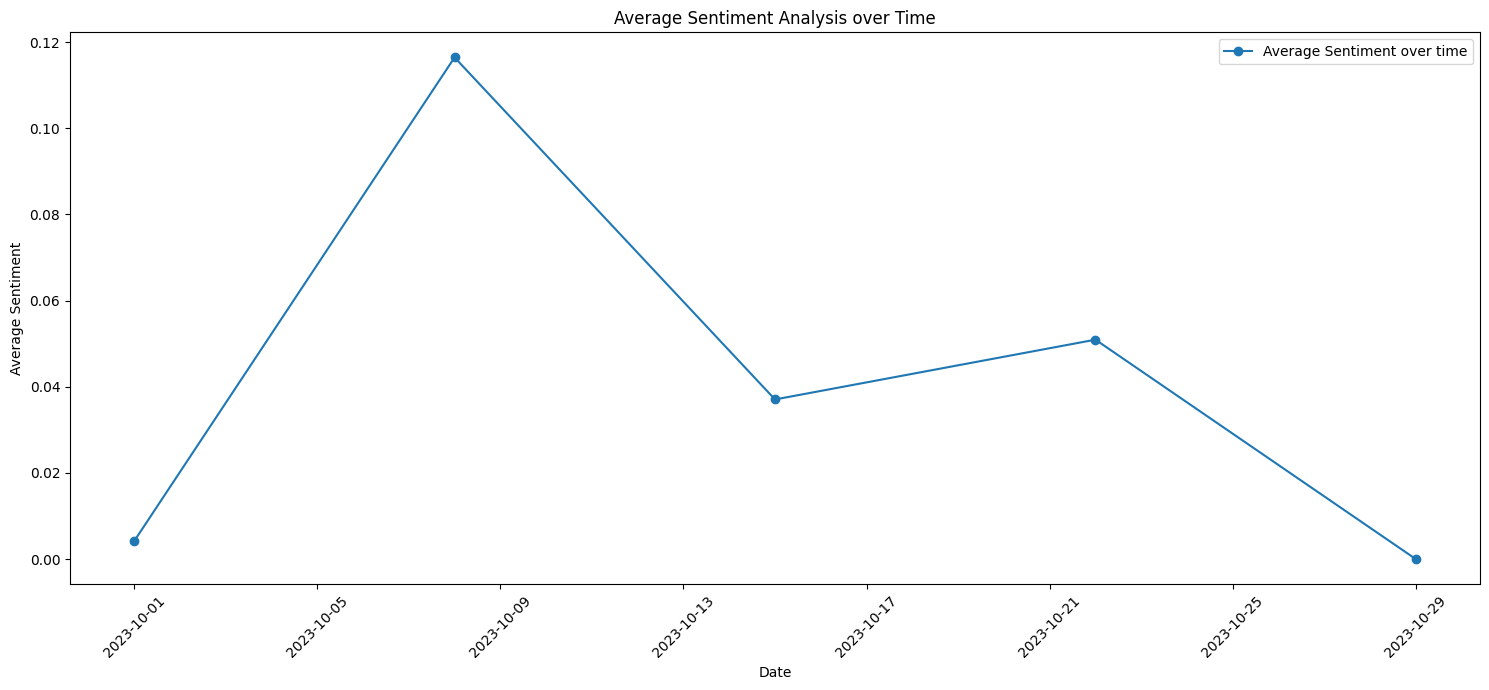

In [4]:
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

sentiment_mapping = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}

df['sentiment'] = df['sentiment'].map(sentiment_mapping, na_action='ignore')

df = df.dropna(subset=['sentiment'])

df.sort_values('created_date', inplace=True)

df.set_index('created_date', inplace=True)

df_weekly_sentiment = df['sentiment'].resample('W').mean()

plt.figure(figsize=(15, 7))
plt.plot(df_weekly_sentiment, label='Average Sentiment over time', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Analysis over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
